# An Overview of Statistical Learning

**Statistical Learning** - a vast set of tools for *understanding data*
* Supervised Learning - building a statistical model for predicting, or estimating, an *output* based on one or more *inputs*
* Unsupervised Learning - there are inputs but no supervising output; nevertheless we can learn relationships and structure from such data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## *Wage Data*
**Regression** - Predicting a continuous or quantitative output value

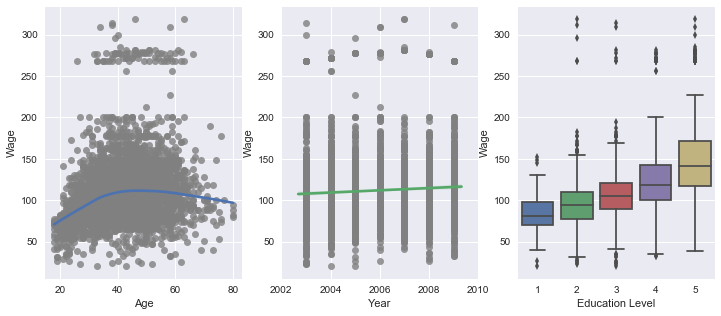

In [108]:
wage = pd.read_csv('../data/Wage.csv')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

fig1 = sns.regplot(x='age', y='wage', data=wage, lowess=True, scatter_kws={'color': 'gray'}, ax=ax1)
fig1.set(xlabel='Age', ylabel='Wage')

fig2 = sns.regplot(x=wage['year'], y=wage['wage'], scatter_kws={'color': 'gray'}, ax=ax2)
fig2.set(xlim=(wage['year'].min()-1, wage['year'].max()+1), xlabel='Year', ylabel='Wage')

#need to extract the integer for education level with a lambda function 
wage['education_int'] = wage['education'].apply(lambda x: int(x.split('.')[0]))
fig3 = sns.boxplot(x=wage['education_int'], y=wage['wage'])
fig3.set(xlabel='Education Level', ylabel='Wage');

## *Stock Market Data*
**Classification** - Predicting a categorical or qualitative output

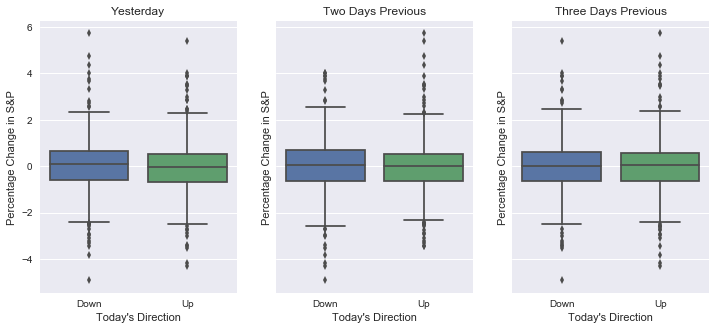

In [106]:
smarket = pd.read_csv('../data/Smarket.csv')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

fig1 = sns.boxplot(x=smarket['Direction'], y=smarket['Lag1'], order=['Down', 'Up'], ax=ax1)
fig1.set(ylabel='Percentage Change in S&P', xlabel='Today\'s Direction', title='Yesterday');

fig2 = sns.boxplot(x=smarket['Direction'], y=smarket['Lag2'], order=['Down', 'Up'], ax=ax2)
fig2.set(ylabel='Percentage Change in S&P', xlabel='Today\'s Direction', title='Two Days Previous');

fig3 = sns.boxplot(x=smarket['Direction'], y=smarket['Lag3'], order=['Down', 'Up'], ax=ax3)
fig3.set(ylabel='Percentage Change in S&P', xlabel='Today\'s Direction', title='Three Days Previous');

## *Gene Expression Data*
**Clustering** - Understand which data is similar to each other according to observed charactaristics

[<matplotlib.text.Text at 0x39bc67f0>, <matplotlib.text.Text at 0x39bcef60>]

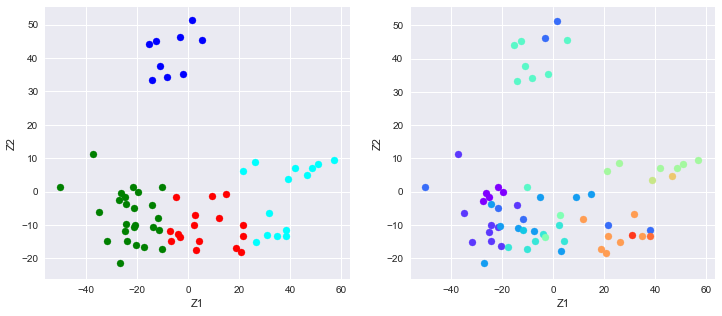

In [211]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

nci60_x = pd.read_csv('../data/NCI60_X.csv', index_col=0)
nci60_y = pd.read_csv('../data/NCI60_y.csv')

#get the first two principal components
pca = PCA(n_components=2)
pca.fit(nci60_x)
pca_comps = pca.transform(nci60_x)

km = KMeans(n_clusters=4)
y_pred = km.fit_predict(pca_comps)

#not quite sure which algorithm was used to cluster the data in figure 1.4...
#I tried kmeans, gaussian mixture, and heirarchical clustering but none were comparable
#sticking with kmeans even though it's different
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(pca_comps[y_pred==0, 0], pca_comps[y_pred==0, 1], c='red')
ax1.scatter(pca_comps[y_pred==1, 0], pca_comps[y_pred==1, 1], c='blue')
ax1.scatter(pca_comps[y_pred==2, 0], pca_comps[y_pred==2, 1], c='green')
ax1.scatter(pca_comps[y_pred==3, 0], pca_comps[y_pred==3, 1], c='cyan')
ax1.set(xlabel='Z1', ylabel='Z2')

#not using different symbols for the second figure, just scaling the rainbow colormap
from matplotlib import colors, cm

uniq = list(nci60_y['x'].unique())
c_norm = colors.Normalize(vmin=0, vmax=len(uniq))
scalar_map = cm.ScalarMappable(norm=c_norm, cmap=plt.get_cmap('rainbow'))
for i in range(len(uniq)):
    ax2.scatter(pca_comps[nci60_y['x'] == uniq[i], 0], pca_comps[nci60_y['x'] == uniq[i], 1],
               color=scalar_map.to_rgba(i))
ax2.set(xlabel='Z1', ylabel='Z2')

# This Book
#### ISLR is based on the following four premises:
1. Many statistical learning methods are relevant and useful in a wide range of academic and non-academic disciplines, beyond just the statistical sciences
2. Statistical learning should not be viewed as a series of black boxes
3. While it is important to know what job is performed by each cog, it is not necessary to have the skills to construct the machine inside the box
4. We presume that the reader is interested in applying statistical learning methods to real-world problems

# Notation and Simple Matrix Algebra
$x_{ij}$ will represent the value of the $j$th variable for the $i$th observation
* $i$ = 1, 2, ..., $n$
  * where $i$ indicates the index of observations
* $j$ = 1, 2, ..., $p$
  * where $j$ indicates the index of variables
  
$X$ will denote a $n \times p$ matrix whose ($i$,$j$)th element is $x_{ij}$:

$$ X = 
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1p}\\
x_{21} & x_{22} & \cdots & x_{2p}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix} $$

Rows (observations):
$$ x_i = 
\begin{pmatrix}
x_{i1}\\
x_{i2}\\
\vdots\\
x_{ip}
\end{pmatrix} $$

Columns (variables):
$$ x_j = 
\begin{pmatrix}
x_{1j}\\
x_{2j}\\
\vdots\\
x_{nj}
\end{pmatrix} $$

Using this notation, $X$ can be written as:
$$ X = \begin{pmatrix}
x_1 & x_2 & \cdots & x_p
\end{pmatrix} $$
or
$$ X = 
\begin{pmatrix}
x_1^T\\
x_2^T\\
\vdots\\
x_n^T
\end{pmatrix} $$

where $^T$ denotes the *transpose* of a matrix or vector

Also, $y_i$ will denote the $i$th observation of the variable on which we wish to make predictions:
$$ y = 
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix} $$

---

### Other matrix definitions
Scalar:  
$a \in \mathbb{R}$  

Vector of length $k$:  
$a \in \mathbb{R}^k$  

$r \times s$ matrix:  
$A \in \mathbb{R}^{r \times s}$

---

### Matrix multiplication
Suppose $A \in \mathbb{R}^{r \times d}$ and $B \in \mathbb{R}^{d \times s}$. The product of $A$ and $B$ is denoted $AB$. The ($i$, $j$)th element of $AB$ is computed by $(AB)_{ij} = \sum_{k=1}^d a_{ik}b_{kj}$. *Note the number of columns in $A$ must equal the number of rows in $B$*.
